## Practical Work 1

For this practical work, we will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read RegData csv file into numpy array 

In [2]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [3]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. 
#### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [7]:
X = data[:, 0]
y = data[:, 1]

#### Explore your data

In [8]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [9]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

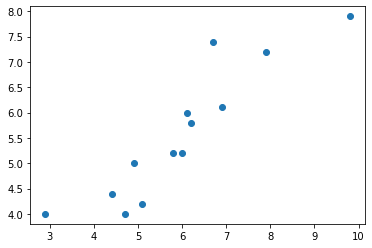

In [10]:
plt.scatter(X, y)

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.

In [11]:
theta_0 = 0
theta_1 = 0

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
#### Note: you will need to iterate through all data points

In [14]:
h_x= theta_0 + theta_1 * X
print(f"h(x): {h_x}")

h(x): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Step3: Calculate the MSE Cost function 𝑱(theta_0,theta_1 ).
<b>Note:</b> You better use either dot product or norm square of the error vector.

In [15]:
m = y.shape[0]

In [22]:
error = h_x - y
j = (1 / (2 * m)) * np.linalg.norm(error, 2)**2

print(f'Error Vector: \n{error}')
print(f'\nj = {j}')

Error Vector: 
[-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

j = 16.305384479692314


### Step4: Calculate the gradient components for theta_0 and theta_1.
<b>Note:</b> You can use the error vector calculated in the previous step.

In [23]:
d_theta_0 = np.sum(error) / m
d_theta_1 = np.sum(error * X) / m

print(f'd_theta_0 : {d_theta_0}')
print(f'd_theta_1 : {d_theta_1}')

d_theta_0 : -5.56923073976923
d_theta_1 : -35.043846043215375


### Step5: Update the parameters (simultaneously).

In [31]:
alpha = 0.0001

In [32]:
theta_0_new = theta_0 - alpha * d_theta_0
theta_1_new = theta_1 - alpha * d_theta_1

print(f'theta_0_new : {theta_0_new}')
print(f'theta_1_new : {theta_1_new}')

theta_0_new : 0.0005569230739769231
theta_1_new : 0.003504384604321538


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
#### The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations or reach the minimum.

In [43]:
# 1. Initialize the parameters with zeros
theta_0 = 0
theta_1 = 0
i = 0
iterations = 1000
cost_vals = []
grad = np.ones((2, 1))
alpha = 0.01

while i < iterations and np.linalg.norm(grad, 2) > 0.01:
    print(f"****************** Iteration {i} ****************** ")
    # 2. Predict the output
    h_x= theta_0 + theta_1 * X
    print(f"h(x): {h_x}")

    # 3. Calculate the cost function
    error = h_x - y
    j = (1 / (2 * m)) * np.linalg.norm(error, 2)**2
    print(f'Error Vector: \n{error}')
    print(f'\nj = {j}')
    cost_vals.append(j)
    
    # 4. Calculate the gradient
    d_theta_0 = np.sum(error) / m
    d_theta_1 = np.sum(error * X) / m
    grad[0] = d_theta_0
    grad[1] = d_theta_1
    print(f"Gradient Vector: \n{grad}")
    print(f"Gradient Vector Norm: {np.linalg.norm(grad, 2)}")

    # 5. Update the parameters
    theta_0 -= alpha * d_theta_0
    theta_1 -= alpha * d_theta_1
    print(f'theta_0_new : {theta_0}')
    print(f'theta_1_new : {theta_1}')

    # Convergence check
    if i > 1 and abs(cost_vals[-2] - cost_vals[-1]) < 0.00001:
      break

    i += 1

Streaming output truncated to the last 5000 lines.

j = 0.16537982777444124
Gradient Vector: 
[[-0.05575515]
 [ 0.00871425]]
Gradient Vector Norm: 0.05643203524755738
theta_0_new : 0.631781578516861
theta_1_new : 0.8199292693535358
****************** Iteration 688 ****************** 
h(x): [3.00957654 6.12530753 4.64943508 7.10922288 8.66708857 6.28929361
 5.63335004 5.71534289 5.55135719 4.81342077 4.48544899 4.23947044
 5.3873715 ]
Error Vector: 
[-0.99042346 -1.27469257 -0.35056492 -0.09077692  0.76708848  0.18929371
 -0.36664996 -0.0846573   0.35135739  0.61342097  0.48544899 -0.16052965
  0.18737169]

j = 0.1653479930857961
Gradient Vector: 
[[-0.05571643]
 [ 0.0087082 ]]
Gradient Vector Norm: 0.05639284695044144
theta_0_new : 0.6323387428024332
theta_1_new : 0.8198421873370199
****************** Iteration 689 ****************** 
h(x): [3.00988116 6.12528124 4.64956554 7.1090921  8.66679234 6.28924991
 5.63337601 5.71536015 5.55139187 4.81353382 4.48559687 4.23964444
 5.38742359]


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [44]:
h = theta_0 + theta_1 * X

print(f"h(x) = y_predict:\n {h_x}")
print(f"\ny_actual:\n {y}")

h(x) = y_predict:
 [3.09480993 6.11795302 4.68593799 7.07263008 8.58420182 6.27706605
 5.64061468 5.720171   5.56105835 4.84505065 4.52682496 4.28815597
 5.40194569]

y_actual:
 [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

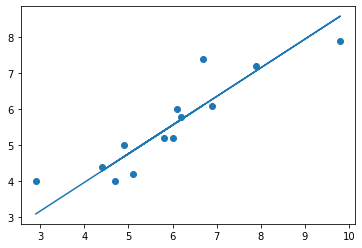

In [46]:
plt.scatter(X, y)
plt.plot(X, h)
plt.show()

#### Use R2 score to evaluate LR equation output
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [47]:
from sklearn.metrics import r2_score
r2_score(y,h)

0.8026968191397711

In [ ]:
from sklearn.metrics import r2_score
r2_score(y,y_pred_GD)

0.7480324921408193

## Plot loss function
### Repeat your implementaion version and save loss for each iteration (epoch)

### Plot loss vs. iterations

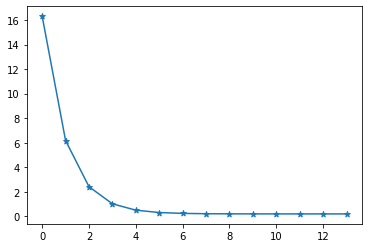

In [51]:
epochs = [*range(14)]
plt.plot(epochs, cost_vals[:14])
plt.scatter(epochs, cost_vals[:14], marker='*')

## Multivariate LR

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,x2, and x3.
#### The last column is the target label y.

In [73]:
data2 = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [74]:
data2

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [75]:
X2 = data2[:, :3]

In [76]:
X2.shape

(25, 3)

In [77]:
X2

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]])

In [78]:
y2 = data2[:, -1]

In [79]:
y2

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b> 
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

In [80]:
m, n = X2.shape
X2 = np.concatenate((np.ones((m, 1)), X2), axis=1)
n += 1

In [81]:
X2

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [82]:
print(n)

4


In [85]:
print(y2.shape)

(25,)


In [86]:
y2 = y2.reshape((m, 1))

In [88]:
# 1. Initialize the parameters with zeros
theta = np.zeros((n, 1))
grad = np.ones((n, 1))
alpha = 0.0001
i = 0
iterations = 4000
cost_vals = []

while i < iterations and np.linalg.norm(grad, 2) > 0.01:
    print(f"****************** Iteration {i} ****************** ")
    # 2. Predict the output
    h_x= np.dot(X2, theta)
    print(f"h(x): {h_x}")

    # 3. Calculate the cost function
    error = h_x - y2
    j = (1 / (2 * m)) * np.linalg.norm(error, 2)**2
    print(f'Error Vector: \n{error}')
    print(f'\nj = {j}')
    cost_vals.append(j)
    
    # 4. Calculate the gradient
    grad = np.dot(X2.T, error) / m
    print(f"Gradient Vector: \n{grad}")
    print(f"Gradient Vector Norm: {np.linalg.norm(grad, 2)}")

    # 5. Update the parameters
    theta = theta - alpha * grad
    print(f'\ntheta_new : {theta}')

    # Convergence check
    if i > 1 and abs(cost_vals[-2] - cost_vals[-1]) < 0.00001:
      break

    i += 1

Streaming output truncated to the last 5000 lines.
 [140.01168373]
 [105.30679076]
 [150.47884753]
 [113.83357917]
 [174.37187436]
 [164.42643023]
 [143.93307249]
 [142.8158506 ]
 [186.10079645]
 [152.92608375]
 [151.44903523]
 [188.54263889]
 [144.36641622]
 [181.19133244]
 [177.0750388 ]
 [158.57255767]
 [176.1375975 ]
 [174.44539146]
 [167.48928857]
 [151.13011203]
 [190.6478033 ]]
Error Vector: 
[[ 0.8905741 ]
 [-0.3229876 ]
 [ 1.38900058]
 [ 2.8300221 ]
 [-1.98831627]
 [ 4.30679076]
 [ 1.47884753]
 [-1.16642083]
 [-0.62812564]
 [ 0.42643023]
 [ 2.93307249]
 [ 1.8158506 ]
 [ 2.10079645]
 [ 0.92608375]
 [ 3.44903523]
 [-3.45736111]
 [-2.63358378]
 [-1.80866756]
 [ 0.0750388 ]
 [-0.42744233]
 [-0.8624025 ]
 [-0.55460854]
 [-7.51071143]
 [ 2.13011203]
 [-1.3521967 ]]

j = 3.0541050651401878
Gradient Vector: 
[[ 0.08155321]
 [ 0.26976136]
 [-0.0795331 ]
 [-0.18543183]]
Gradient Vector Norm: 0.34660149691680425

theta_new : [[-0.00573529]
 [ 0.37742175]
 [ 0.52186035]
 [ 1.11460991]]
**

In [89]:
print("****************** Training Report ********************")
print(f"Gradient Descent converged after {i} iterations")
print(f"\nTheta Opt: \n{theta}")
print(f"\nError vector: \n{error}")
print(f"\nCost fn: \n{j}")

****************** Training Report ********************
Gradient Descent converged after 2175 iterations

Theta Opt: 
[[-0.00635584]
 [ 0.37546813]
 [ 0.52245283]
 [ 1.11593705]]

Error vector: 
[[ 0.89427508]
 [-0.32973987]
 [ 1.38786336]
 [ 2.83263415]
 [-1.9995606 ]
 [ 4.30287385]
 [ 1.48947458]
 [-1.14602706]
 [-0.63246421]
 [ 0.42974677]
 [ 2.93601142]
 [ 1.81519869]
 [ 2.09553527]
 [ 0.9153897 ]
 [ 3.45844262]
 [-3.45953288]
 [-2.65193189]
 [-1.79076113]
 [ 0.07113352]
 [-0.42908497]
 [-0.85281105]
 [-0.55654187]
 [-7.50172017]
 [ 2.12440616]
 [-1.3591948 ]]

Cost fn: 
3.0532720610157402


In [91]:
h_x= np.dot(X2, theta)
print(f"h(x): {h_x}")
print(f"\ny_actual: {y2}")

h(x): [[152.89432281]
 [184.67017498]
 [181.38784978]
 [198.83266702]
 [140.00029796]
 [105.30282302]
 [150.48960743]
 [113.85422778]
 [174.3674796 ]
 [164.42978501]
 [143.93604791]
 [142.81518896]
 [186.09547066]
 [152.91525748]
 [151.45855979]
 [188.54043897]
 [144.34783994]
 [181.20946308]
 [177.07108626]
 [158.57089604]
 [176.14730874]
 [174.4434329 ]
 [167.49839247]
 [151.12433746]
 [190.64071761]]

y_actual: [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

In [92]:
h_x = theta[0] + theta[1] * X2[:, 1] + theta[2] * X2[:, 2] + theta[3] * X2[:, 3]
print(f"h(x): {h_x}")
print(f"\ny_actual: {y2}")

h(x): [152.89432281 184.67017498 181.38784978 198.83266702 140.00029796
 105.30282302 150.48960743 113.85422778 174.3674796  164.42978501
 143.93604791 142.81518896 186.09547066 152.91525748 151.45855979
 188.54043897 144.34783994 181.20946308 177.07108626 158.57089604
 176.14730874 174.4434329  167.49839247 151.12433746 190.64071761]

y_actual: [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


### Plot loss vs. iterations

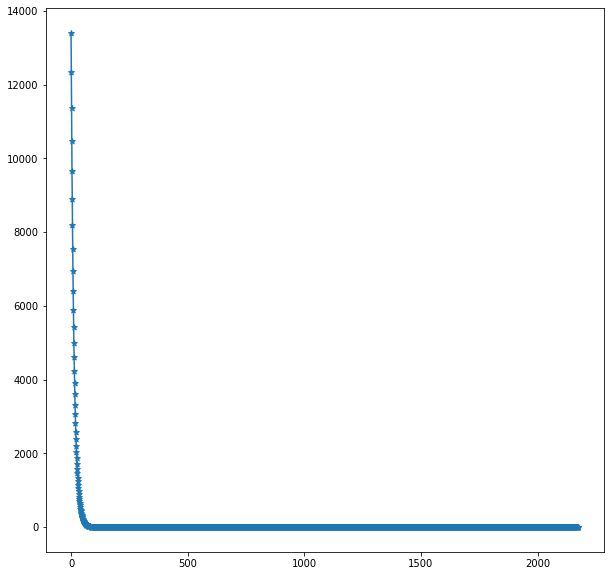

In [96]:
plt.figure(figsize=(10, 10))
epochs = [*range(i+1)]
plt.plot(epochs, cost_vals)
plt.scatter(epochs, cost_vals, marker='*')

#### Use R2 score to evaluate LR equation output

In [97]:
r2_score(y2, h_x)

0.988997221965864

In [ ]:
r2_score(y_new,y_pred_GD_Multi)

0.9890131164245575

In [ ]:
def gradient_descent1(X, y, alpha, iterations):
  cost_vals = []
  h_s = []
  thetas0 = []
  thetas1 = []

  # 1. Initialize the parameters with zeros
  theta_0 = 0
  theta_1 = 0
  i = 0
  grad = np.ones((2, 1))
  m = y.shape[0]

  while i < iterations and np.linalg.norm(grad, 2) > 0.001:
      print(f"****************** Iteration {i} ****************** ")
      # 2. Predict the output
      h_x= theta_0 + theta_1 * X
      h_s.append(h_x)
      print(f"h(x): {h_x}")

      # 3. Calculate the cost function
      error = h_x - y
      j = (1 / (2 * m)) * np.linalg.norm(error, 2)**2
      print(f'Error Vector: \n{error}')
      print(f'\nj = {j}')
      cost_vals.append(j)
      
      # 4. Calculate the gradient
      d_theta_0 = np.sum(error) / m
      d_theta_1 = np.sum(error * X) / m
      grad[0] = d_theta_0
      grad[1] = d_theta_1
      print(f"Gradient Vector: \n{grad}")
      print(f"Gradient Vector Norm: {np.linalg.norm(grad, 2)}")

      # 5. Update the parameters
      theta_0 -= alpha * d_theta_0
      theta_1 -= alpha * d_theta_1
      print(f'theta_0_new : {theta_0}')
      print(f'theta_1_new : {theta_1}')
      thetas0.append(theta_0)
      thetas1.append(theta_1)

      # Convergence check
      if i > 1 and abs(cost_vals[-2] - cost_vals[-1]) < 0.001:
        break

      i += 1
    
  return theta_0, theta_1, cost_vals, h_s, thetas0, thetas1